# 연구과제 (PiePlot, BoxPlot, ScatterPlot)

## 문제 1

다음의 데이터는 어느 기업의 직원 40명을 대상으로 성별과 결혼상태, 나이, 최종학력, 월수입을 조사한 가상의 자료이다.

이 자료를 활용하여 연령대를 `10대`, `20대`, `30대`, `40대`, `50대`로 구분하고 각 연령대별로 어느 정도의 비율을 차지하는지 시각화고 결과를 해석하시오.

| 성별 | 결혼상태 | 나이  | 최종학력 | 월수입  |
|----|------|-----|------|------|
| 남자 | 기혼   | 21  | 대학교  | 60   |
| 남자 | 기혼   | 22  | 대학원  | 100  |
| 남자 | 기혼   | 33  | 대학교  | 200  |
| 여자 | 미혼   | 33  | 대학교  | 120  |
| 남자 | 미혼   | 28  | 대학교  | 70   |
| 남자 | 기혼   | 21  | 대학원  | 80   |
| 여자 | 미혼   | 39  | 대학교  | 190  |

전체 데이터는 아래의 URL에서 얻을 수 있다.

> https://data.hossam.kr/pydata/poll.xlsx


In [4]:
import sys
from pandas import read_excel
import numpy as np
from matplotlib import pyplot as plt

In [8]:
origin = read_excel("https://data.hossam.kr/pydata/poll.xlsx")
origin

,성별,결혼상태,나이,최종학력,월수입
0,남자,기혼,21,대학교,60
1,남자,기혼,22,대학원,100
2,남자,기혼,33,대학교,200
3,여자,미혼,33,대학교,120
4,남자,미혼,28,대학교,70
5,남자,기혼,21,대학원,80
6,여자,미혼,39,대학교,190
7,남자,기혼,32,대학교,100
8,남자,미혼,44,초등학교,120
9,남자,미혼,55,대학교,110


In [122]:
plt.rcParams["font.family"]='Malgun Gothic'
plt.rcParams["font.size"] =12
plt.rcParams["figure.figsize"] = (12, 6)
plt.rcParams['axes.unicode_minus'] = False

In [123]:
origin['나이'].min()
df1 = origin
df1['연령대']=df1['나이'].apply(lambda x : "%d대" % ((x//10)*10))

20

In [125]:
hist,bins = np.histogram(origin['나이'], [20, 30, 40, 50, 60])
hist, bins


(array([17, 10,  8,  5], dtype=int64), array([20, 30, 40, 50, 60]))

In [126]:
data = hist
labels = []
for i in range(0, len(bins)-1):
    labels.append("%d대" % bins[i])
labels


['20대', '30대', '40대', '50대']

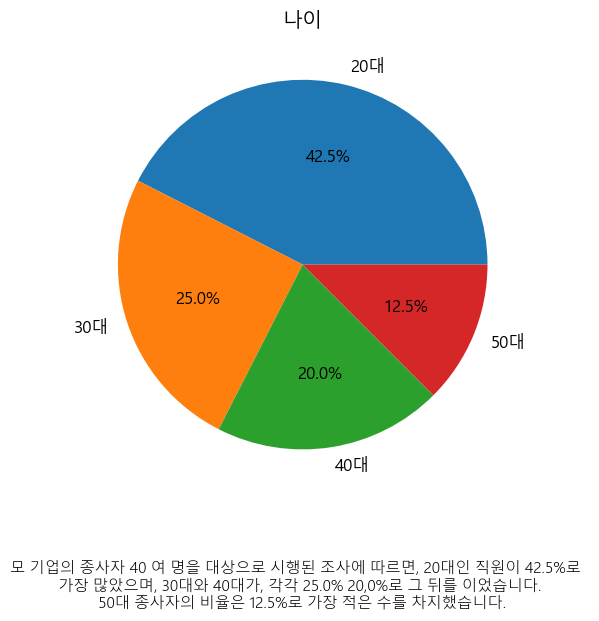

In [128]:
plt.figure()
plt.title("나이")
txt = "모 기업의 종사자 40 여 명을 대상으로 시행된 조사에 따르면, 20대인 직원이 42.5%로  \n 가장 많았으며, 30대와 40대가, 각각 25.0% 20,0%로 그 뒤를 이었습니다. \n 50대 종사자의 비율은 12.5%로 가장 적은 수를 차지했습니다."
plt.figtext(0.51, 0, txt, wrap=True,
            verticalalignment="top", horizontalalignment="center",
            fontdict={"size": 11, "weight": "light"})
plt.pie(hist, labels=labels, autopct='%0.1f%%')


plt.show()

plt.close()

## 문제 2

위 `문제1`의 데이터를 활용하여 월수입 100만원 미만인 경우 `저소득`, 100만원 이상 250만원 미만인 경우 `보통`, 250만원 이상인 경우 `고소득`으로 구분하여 각각 어느 정도의 비율을 차지하는지 시각화 하고 결과를 해석하시오.

In [129]:
origin['월수입']  # 50, 349
hist, bins = np.histogram(origin['월수입'], [0, 100, 250, 349])
hist, bins

(array([15, 22,  3], dtype=int64), array([  0, 100, 250, 349]))

In [130]:
data = hist
labels = ['저소득', '보통', '고소득']

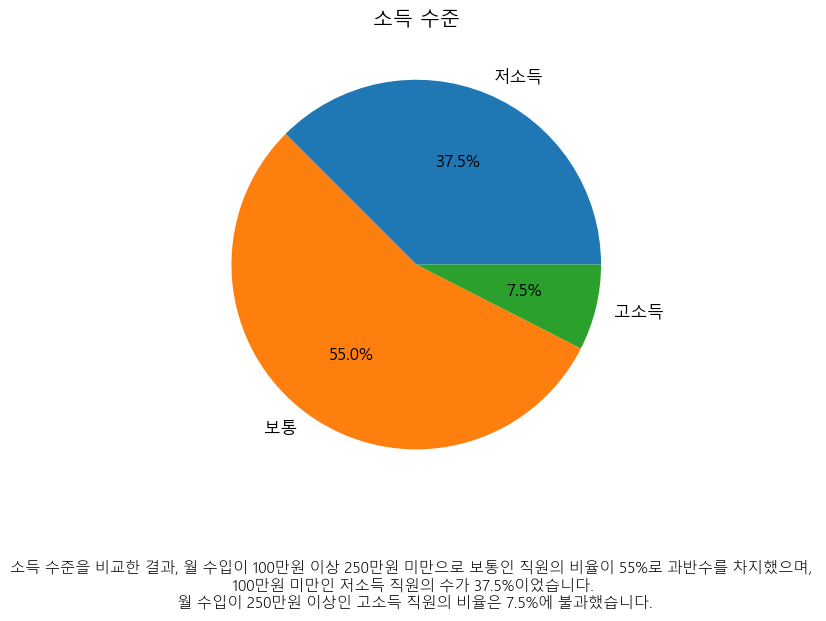

In [133]:
plt.figure()
plt.title("소득 수준")
txt = "소득 수준을 비교한 결과, 월 수입이 100만원 이상 250만원 미만으로 보통인 직원의 비율이 55%로 과반수를 차지했으며, \n 100만원 미만인 저소득 직원의 수가 37.5%이었습니다. \n 월 수입이 250만원 이상인 고소득 직원의 비율은 7.5%에 불과했습니다."
plt.figtext(0.51, 0, txt, wrap=True,
            verticalalignment="top", horizontalalignment="center",
            fontdict={"size": 11, "weight": "light"})
plt.pie(data, labels=labels, autopct='%0.1f%%')
plt.show()
plt.close()

## 문제 3

위 `문제1`의 데이터를 활용하여 나이와 월수입의 관계를 알아보고자 한다. 시각화 결과를 통해 나이와 월수입의 관계를 해석하고 `20,25,30,35,40,45,50`세의 예상 월 수입을 표시하는 BarPlot을 제시하고 결과를 해석하시오.

In [5]:
plt.rcParams["font.family"]='Malgun Gothic'
plt.rcParams["font.size"] =12
plt.rcParams["figure.figsize"] = (12, 6)
plt.rcParams['axes.unicode_minus'] = False

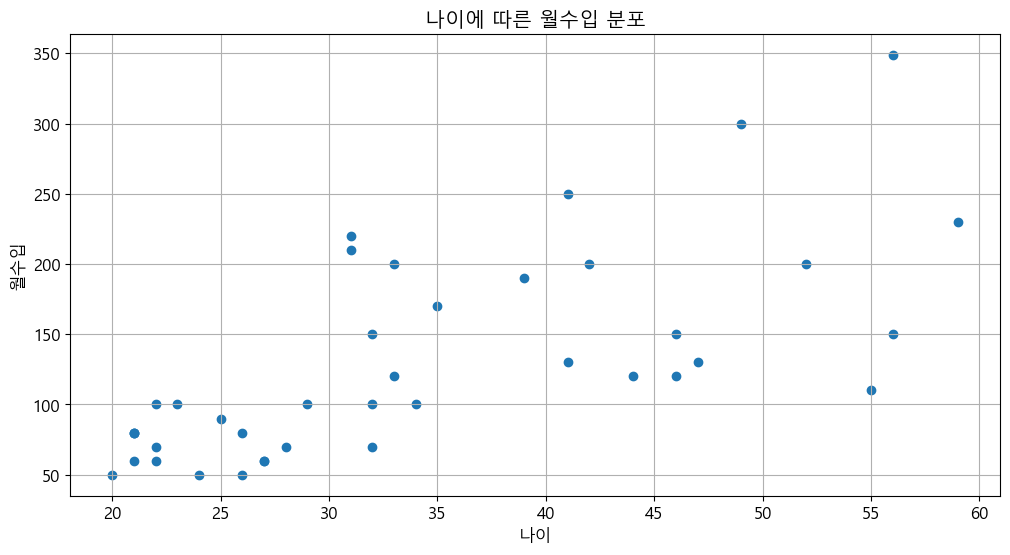

In [9]:
plt.figure()
plt.scatter(origin['나이'], origin['월수입'])
plt.title("나이에 따른 월수입 분포")
plt.xlabel("나이")
plt.ylabel("월수입")
plt.grid()
plt.show()
plt.close()

In [10]:
z = np.polyfit(origin['나이'], origin['월수입'], 3)
print("상수항:", z[0])
print("계수:", z[1])

상수항: 0.0020428798078042584
계수: -0.30022934774405785


In [11]:
print("f(x) = %f * x + %f" % (z[0], z[1]))
f = np.poly1d(z) 

x = 50

print("나이가 %d일 경우 월수입은 %f로 예상됩니다." % (x, f(x)))

f(x) = 0.002043 * x + -0.300229
나이가 50일 경우 월수입은 193.636972로 예상됩니다.


In [12]:
x1 = [20,25,30,35,40,45,50]
y1 = f(x1)
y1

array([ 54.27422566,  90.77082083, 119.91674789, 143.2441667 ,
       162.28523711, 178.57211898, 193.63697217])

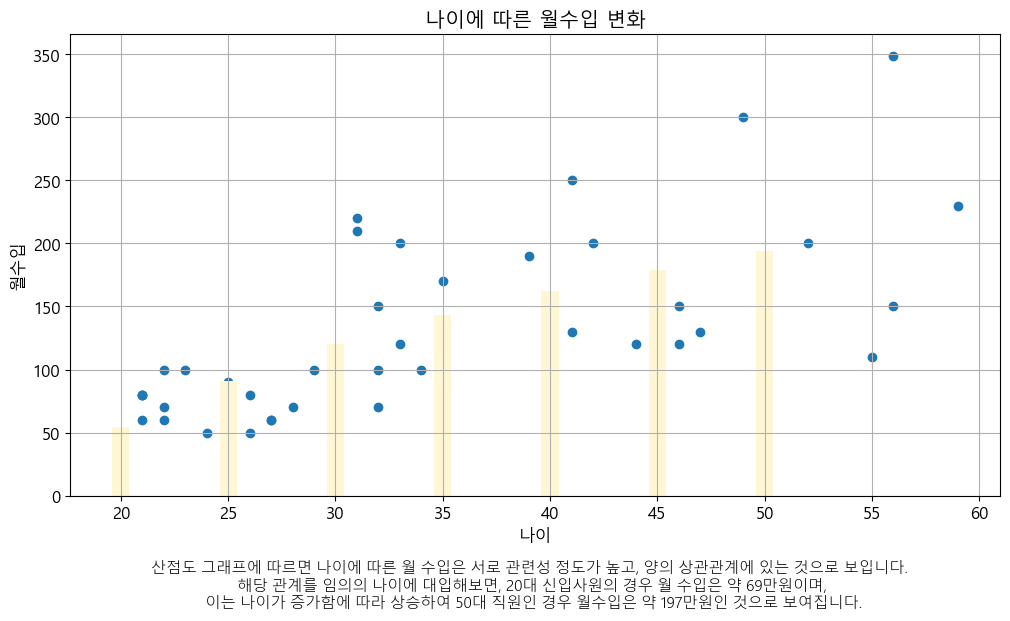

In [13]:
plt.figure()
plt.scatter(origin['나이'], origin['월수입'])
plt.plot(x, f(x), color="#9BB8CD")
plt.bar(x1, y1, color="#FFF7D4")
plt.title("나이에 따른 월수입 변화")
plt.xlabel("나이")
plt.ylabel("월수입")
txt = "산점도 그래프에 따르면 나이에 따른 월 수입은 서로 관련성 정도가 높고, 양의 상관관계에 있는 것으로 보입니다. \n 해당 관계를 임의의 나이에 대입해보면, 20대 신입사원의 경우 월 수입은 약 69만원이며, \n 이는 나이가 증가함에 따라 상승하여 50대 직원인 경우 월수입은 약 197만원인 것으로 보여집니다."
plt.figtext(0.51, 0, txt, wrap=True,
            verticalalignment="top", horizontalalignment="center",
            fontdict={"size": 11, "weight": "light"})
plt.grid()
plt.show()
plt.close()

## 문제 4

다음 데이터는 종사자 규모별 업체수를 2015년과 2016년도에 걸쳐 조사한 데이터이다.

2015년과 2016년에 대한 평균치를 활용하여 종사자 규모별 업장 수가 전체 대비 어느 정도의 비율을 차지하는지 시각화 하고 결과를 해석하시오.

| 종사자규모별   | 2015  | 2016  |
|----------|-------|-------|
| 1~4명     | 553.5 | 576.7 |
| 5~9명     | 211.6 | 216.8 |
| 10~29명   | 194.7 | 195.5 |
| 30~49명   | 227.4 | 227.4 |
| 50~99명   | 152.8 | 155.7 |
| 100~199명 | 221.9 | 220.6 |
| 200~299명 | 80.9  | 81    |
| 300~999명 | 100.5 | 99.3  |
| 1000명 이상 | 557.6 | 549.7 |

전체 데이터는 아래의 URL에서 얻을 수 있다.

> https://data.hossam.kr/pydata/jobs_by_scale.xlsx

> 출처: 국가통계포털

In [91]:
origin = read_excel("https://data.hossam.kr/pydata/jobs_by_scale.xlsx")
origin

,종사자규모별,2015,2016
0,1~4명,553.5,576.7
1,5~9명,211.6,216.8
2,10~29명,194.7,195.5
3,30~49명,227.4,227.4
4,50~99명,152.8,155.7
5,100~199명,221.9,220.6
6,200~299명,80.9,81.0
7,300~999명,100.5,99.3
8,1000명 이상,557.6,549.7


In [93]:
origin['평균'] = (origin[2015] + origin[2016])/2
origin

,종사자규모별,2015,2016,평균
0,1~4명,553.5,576.7,565.10
1,5~9명,211.6,216.8,214.20
2,10~29명,194.7,195.5,195.10
3,30~49명,227.4,227.4,227.40
4,50~99명,152.8,155.7,154.25
5,100~199명,221.9,220.6,221.25
6,200~299명,80.9,81.0,80.95
7,300~999명,100.5,99.3,99.90
8,1000명 이상,557.6,549.7,553.65


In [94]:
plt.rcParams["font.family"]='Malgun Gothic'
plt.rcParams["font.size"] =12
plt.rcParams["figure.figsize"] = (12, 6)
plt.rcParams['axes.unicode_minus'] = False

In [102]:
origin_sorted = origin.sort_values(by = '평균', ascending=False)

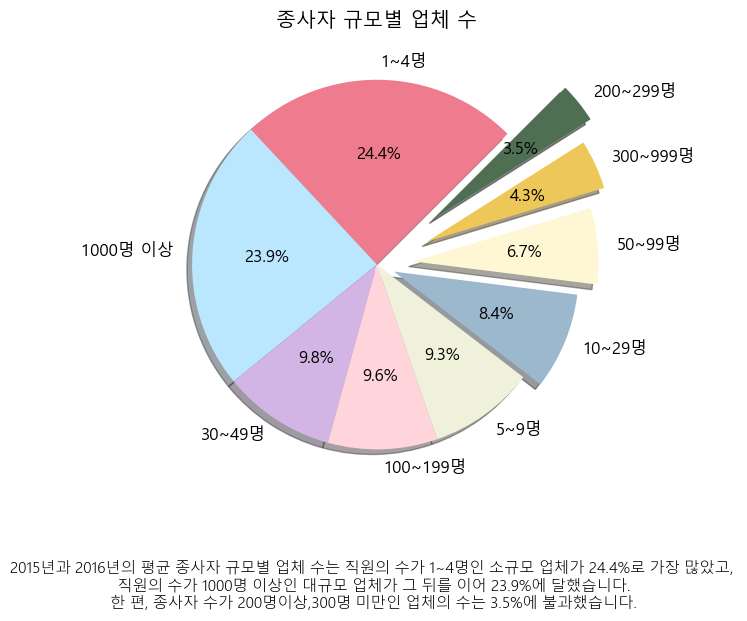

In [149]:
plt.figure()
plt.title("종사자 규모별 업체 수")
plt.pie(origin_sorted['평균'], labels=origin_sorted['종사자규모별'], autopct='%0.1f%%',
        colors = ['#EF7C8E', '#BBE7FE', '#D3B5E5', '#FFD4DB', '#EFF1DB','#9BB8CD','#FFF7D4','#EEC759', '#4F6F52' ],
        explode=[0, 0, 0, 0,0 , 0.1, 0.2, 0.3, 0.4],
        startangle=45,
        shadow=True)
txt = "2015년과 2016년의 평균 종사자 규모별 업체 수는 직원의 수가 1~4명인 소규모 업체가 24.4%로 가장 많았고, \n 직원의 수가 1000명 이상인 대규모 업체가 그 뒤를 이어 23.9%에 달했습니다. \n 한 편, 종사자 수가 200명이상,300명 미만인 업체의 수는 3.5%에 불과했습니다. "
plt.figtext(0.51, 0, txt, wrap=True,
            verticalalignment="top", horizontalalignment="center",
            fontdict={"size": 11, "weight": "light"})
plt.show()
plt.close()

## 문제 5

아래의 데이터는 2002년도부터 2018년도까지 월별 교통사고의 발생건수, 사망자수, 부상자수를 조사한 데이터의 일부이다.

교통사고 발생건수와 부상자수의 상관관계를 알아보고자 한다. 적합한 시각화 결과물을 제시하고 결과를 해석하시오.

| 년도   | 월 | 발생건수   | 사망자수 | 부상자수   |
|------|---|--------|------|--------|
| 2005 | 1 | 15494  | 504  | 25413  |
| 2005 | 2 | 13244  | 431  | 21635  |
| 2005 | 3 | 16580  | 477  | 25550  |
| 2005 | 4 | 17817  | 507  | 28131  |
| 2005 | 5 | 19085  | 571  | 29808  |
| 2005 | 6 | 18092  | 476  | 28594  |

전체 데이터는 아래의 URL을 통해 확인할 수 있다.

> https://data.hossam.kr/pydata/traffic_acc.xlsx

In [150]:
origin = read_excel("https://data.hossam.kr/pydata/traffic_acc.xlsx")
origin

,년도,월,발생건수,사망자수,부상자수
0,2005,1,15494,504,25413
1,2005,2,13244,431,21635
2,2005,3,16580,477,25550
3,2005,4,17817,507,28131
4,2005,5,19085,571,29808
...,...,...,...,...,...
163,2018,8,18335,357,27749
164,2018,9,18371,348,27751
165,2018,10,19738,373,28836
166,2018,11,19029,298,28000


In [106]:
plt.rcParams["font.family"]='Malgun Gothic'
plt.rcParams["font.size"] =12
plt.rcParams["figure.figsize"] = (12, 6)
plt.rcParams['axes.unicode_minus'] = False

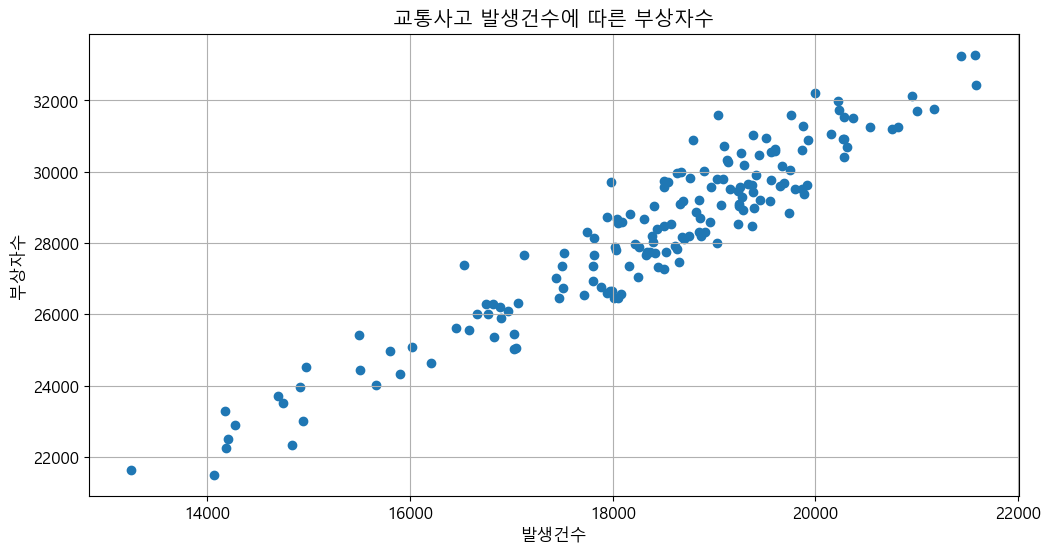

In [151]:
plt.figure()
plt.scatter(origin['발생건수'], origin['부상자수'])
plt.title("교통사고 발생건수에 따른 부상자수")
plt.xlabel("발생건수")
plt.ylabel("부상자수")
plt.grid()
plt.show()
plt.close()

In [152]:
z = np.polyfit(origin['발생건수'], origin['부상자수'], 1)
print("상수항:", z[0])
print("계수:", z[1])

상수항: 1.4044180973028615
계수: 2495.338546755988


In [153]:
print("f(x) = %f * x + %f" % (z[0], z[1]))

f(x) = 1.404418 * x + 2495.338547


In [154]:
f = np.poly1d(z)  

In [155]:
x = 40

print("교통사고 발생건수가 %d일 경우 부상자 수는 %f로 예상됩니다." % (x, f(x)))

교통사고 발생건수가 40일 경우 부상자 수는 2551.515271로 예상됩니다.


In [156]:
x = origin['발생건수']
y = f(x)
y

array([24255.39254637, 21095.45182744, 25780.59060004, 27517.8557864 ,
       29298.65793378, 27904.07076316, 28722.84651389, 29228.43702892,
       28840.81763406, 30242.42689517, 29360.45233006, 28482.69101925,
       23520.88188148, 22536.38479527, 26043.21678423, 27701.83455715,
       29375.90092913, 26981.36807323, 28665.2653719 , 28889.97226747,
       29590.77689802, 29319.72420524, 30410.95706684, 27095.12593911,
       23440.83004993, 23134.66690472, 28007.99770236, 27852.10729356,
       29550.0487732 , 28210.23390837, 27826.82776781, 27749.58477246,
       28485.49985544, 29215.79726604, 27515.04695021, 26217.3646283 ,
       23197.8657191 , 22404.36949412, 26022.15051277, 27069.84641336,
       29902.55771562, 28932.10481039, 29968.56536619, 28540.27216124,
       27807.16591445, 30479.77355361, 30017.7199996 , 28705.99349672,
       25713.17853137, 24266.62789114, 28089.453952  , 29394.1583644 ,
       30916.54758187, 29528.98250174, 30978.34197816, 30573.86956613,
      

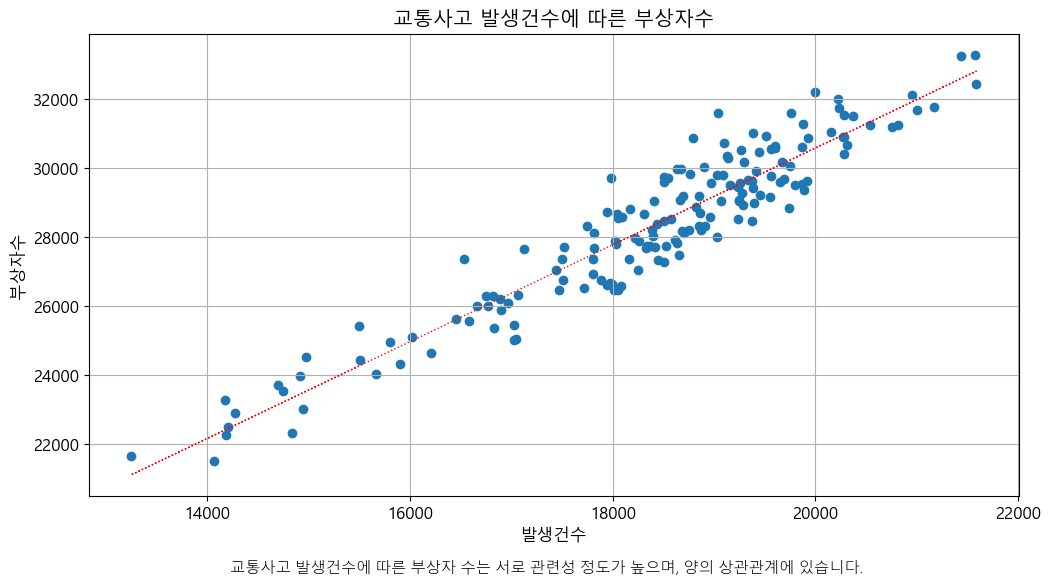

In [159]:
plt.figure()
plt.scatter(origin['발생건수'], origin['부상자수'])
plt.plot(x, y, color="#ff0000", linewidth=1.0, linestyle=":")
plt.title("교통사고 발생건수에 따른 부상자수")
txt = "교통사고 발생건수에 따른 부상자 수는 서로 관련성 정도가 높으며, 양의 상관관계에 있습니다.  "
plt.figtext(0.51, 0, txt, wrap=True,
            verticalalignment="top", horizontalalignment="center",
            fontdict={"size": 11, "weight": "light"})
plt.xlabel("발생건수")
plt.ylabel("부상자수")
plt.grid()
plt.show()
plt.close()